#1. IMPORT THE NECESSARY LIBRARIES AND LOAD THE DATASET


In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Food Prices/globalfoodprices_wfp.csv'

df = pd.read_csv(file_path, engine='python')

# 2. DATA PREPROCESSING

In [4]:
# 2.1 Basic dataset info
print("Initial shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

# 2.2 Remove duplicates
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)

# 2.3 Handle missing values
# Strategy: Drop rows where key fields (mp_price, cm_name, date) are missing
# Create a date column from 'mp_month' and 'mp_year'
df['date'] = pd.to_datetime(df['mp_year'].astype(str) + '-' + df['mp_month'].astype(str) + '-01', errors='coerce')
df.dropna(subset=['mp_price', 'cm_name', 'date'], inplace=True)

# Fill missing market names with "Unknown"
df['mkt_name'] = df['mkt_name'].fillna("Unknown")

# 2.4 Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove rows with invalid dates
df = df.dropna(subset=['date'])

# 2.5 Standardize column names (lowercase, no spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2.6 Currency normalization (optional)
# Example: Convert prices to USD if you have an exchange rate dataset
# For now, we just ensure numeric type for price
df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')

# Remove rows with non-positive prices
df = df[df['mp_price'] > 0]

# 2.7 Trim whitespace from text columns
text_columns = df.select_dtypes(include=['object']).columns
for col in text_columns:
    df[col] = df[col].astype(str).str.strip()

# 2.8 Save cleaned dataset for future steps
df.to_csv("globalfoodprices_cleaned.csv", index=False)

print("Final cleaned dataset shape:", df.shape)
print("Preview:\n", df.head())

Initial shape: (2050638, 18)

Column names: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Data types:
 adm0_id               float64
adm0_name              object
adm1_id                 int64
adm1_name              object
mkt_id                  int64
mkt_name               object
cm_id                   int64
cm_name                object
cur_id                float64
cur_name               object
pt_id                   int64
pt_name                object
um_id                   int64
um_name                object
mp_month                int64
mp_year                 int64
mp_price              float64
mp_commoditysource    float64
dtype: object

Missing values per column:
 adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              611016
mkt_id                      0

# 3. EXPLORATORY DATA ANALYSIS (EDA)

/tmp/ipython-input-977663959.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalfoodprices_cleaned.csv", parse_dates=['date'])


Dataset shape: (2050604, 19)

Data types:
 adm0_id                      float64
adm0_name                     object
adm1_id                        int64
adm1_name                     object
mkt_id                         int64
mkt_name                      object
cm_id                          int64
cm_name                       object
cur_id                       float64
cur_name                      object
pt_id                          int64
pt_name                       object
um_id                          int64
um_name                       object
mp_month                       int64
mp_year                        int64
mp_price                     float64
mp_commoditysource           float64
date                  datetime64[ns]
dtype: object

First 5 rows:
    adm0_id    adm0_name  adm1_id   adm1_name  mkt_id  mkt_name  cm_id  \
0      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
1      1.0  Afghanistan      272  Badakhshan     266  Fayzabad     55   
2    

/tmp/ipython-input-977663959.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")


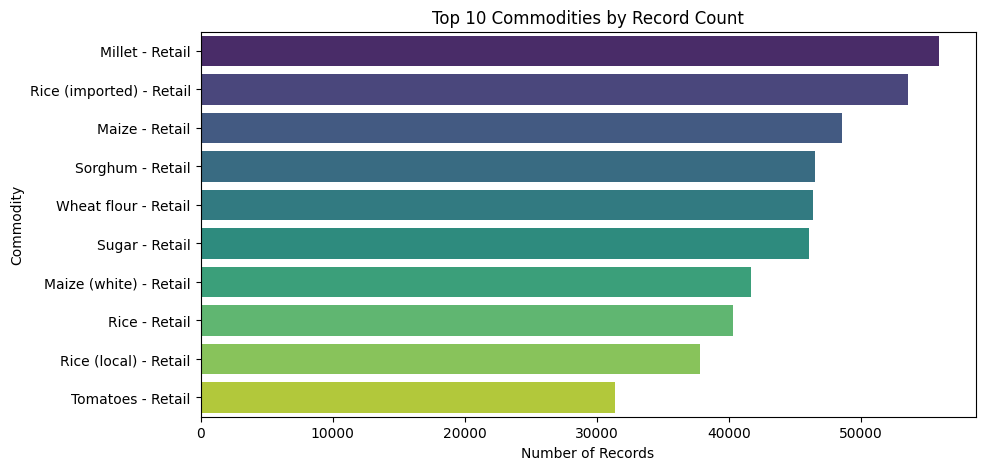

/tmp/ipython-input-977663959.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_commodities.values, y=avg_price_commodities.index, palette="mako")


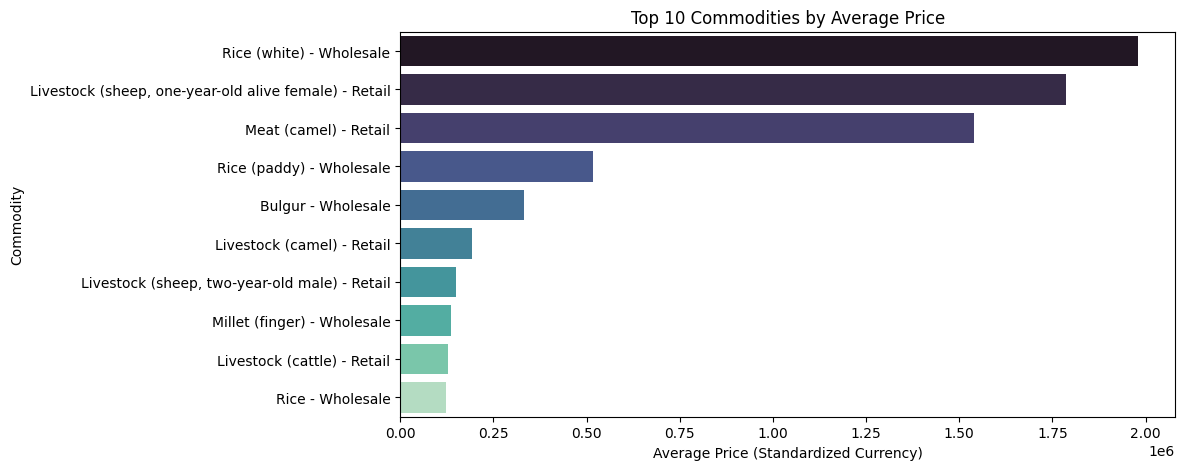

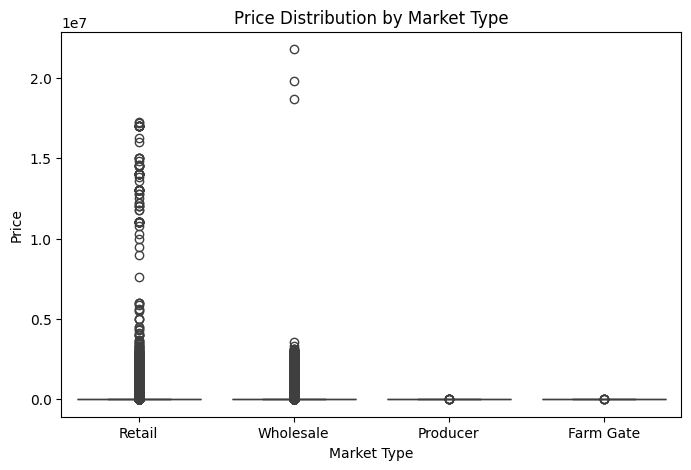

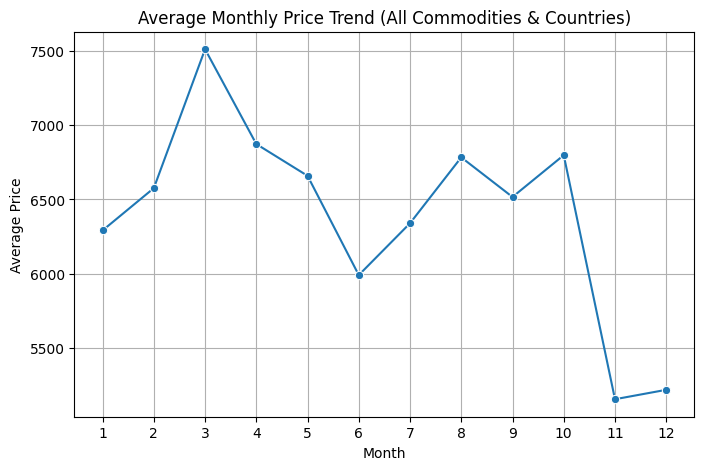

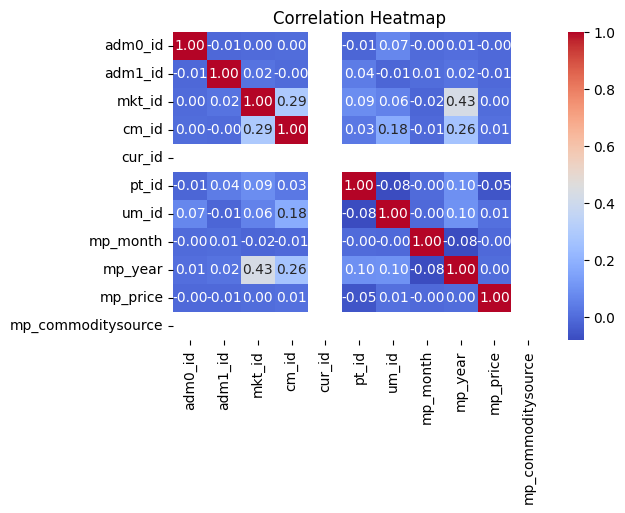

In [8]:
# If you're starting fresh, load the cleaned dataset
df = pd.read_csv("globalfoodprices_cleaned.csv", parse_dates=['date'])

# 3.1 Basic Dataset Overview
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 3.2 Summary statistics for price
print("\nPrice Summary Statistics:\n", df['mp_price'].describe())

# 3.3 Number of unique countries, commodities, and markets
print("\nUnique Countries:", df['adm0_name'].nunique())
print("Unique Commodities:", df['cm_name'].nunique())
print("Unique Markets:", df['mkt_name'].nunique())

# 3.4 Missing value check
print("\nMissing Values:\n", df.isnull().sum())

# 3.5 Top 10 commodities by frequency
top_commodities = df['cm_name'].value_counts().head(10)
print("\nTop 10 Commodities:\n", top_commodities)

# Bar plot for top 10 commodities
plt.figure(figsize=(10,5))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")
plt.title("Top 10 Commodities by Record Count")
plt.xlabel("Number of Records")
plt.ylabel("Commodity")
plt.show()

# 3.6 Average price per commodity
avg_price_commodities = df.groupby('cm_name')['mp_price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_commodities.values, y=avg_price_commodities.index, palette="mako")
plt.title("Top 10 Commodities by Average Price")
plt.xlabel("Average Price (Standardized Currency)")
plt.ylabel("Commodity")
plt.show()

# 3.7 Boxplot to check price distribution by market type
plt.figure(figsize=(8,5))
sns.boxplot(x='pt_name', y='mp_price', data=df)
plt.title("Price Distribution by Market Type")
plt.xlabel("Market Type")
plt.ylabel("Price")
plt.show()

# 3.8 Seasonal trend example (monthly average)
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['mp_price'].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker="o")
plt.title("Average Monthly Price Trend (All Commodities & Countries)")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

# 3.9 Correlation heatmap for numeric fields
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [6]:
!pip install statsmodels --quiet

# 4. DATA ANALYSIS & MODELING (FINAL FIX WITH CONTAINS FILTER)

Number of rows after filtering: 1751
Time series shape: (209, 2)
        date  mp_price
0 2004-01-01     32.71
1 2004-02-01     33.62
2 2004-03-01     32.92
3 2004-04-01     32.98
4 2004-05-01     34.10


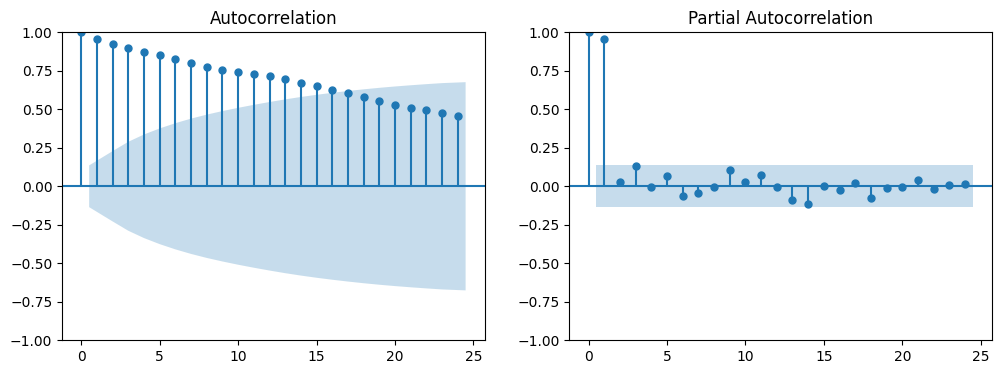

                               SARIMAX Results                                
Dep. Variable:               mp_price   No. Observations:                  209
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -581.387
Date:                Thu, 14 Aug 2025   AIC                           1172.774
Time:                        05:09:52   BIC                           1189.462
Sample:                             0   HQIC                          1179.522
                                - 209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3469      0.261     -1.328      0.184      -0.859       0.165
ar.L2          0.4991      0.255      1.956      0.050      -0.001       0.999
ma.L1          0.3136      0.241      1.300      0.1

/tmp/ipython-input-1324289613.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data_ts['date'].max(), periods=12, freq='M'),


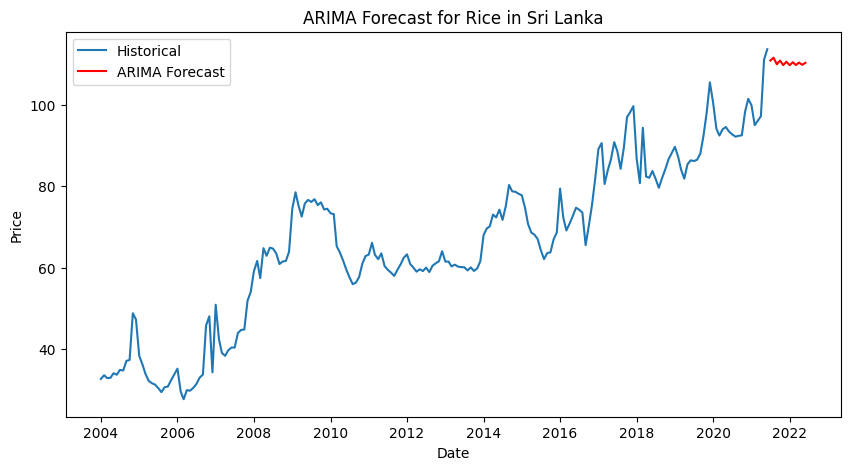

DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y8hj8t/ncnygt5a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y8hj8t/xcvlo5e4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62595', 'data', 'file=/tmp/tmph0y8hj8t/ncnygt5a.json', 'init=/tmp/tmph0y8hj8t/xcvlo5e4.json', 'output', 'file=/tmp/tmph0y8hj8t/prophet_modele3shhafr/prophet_model-20250814050958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


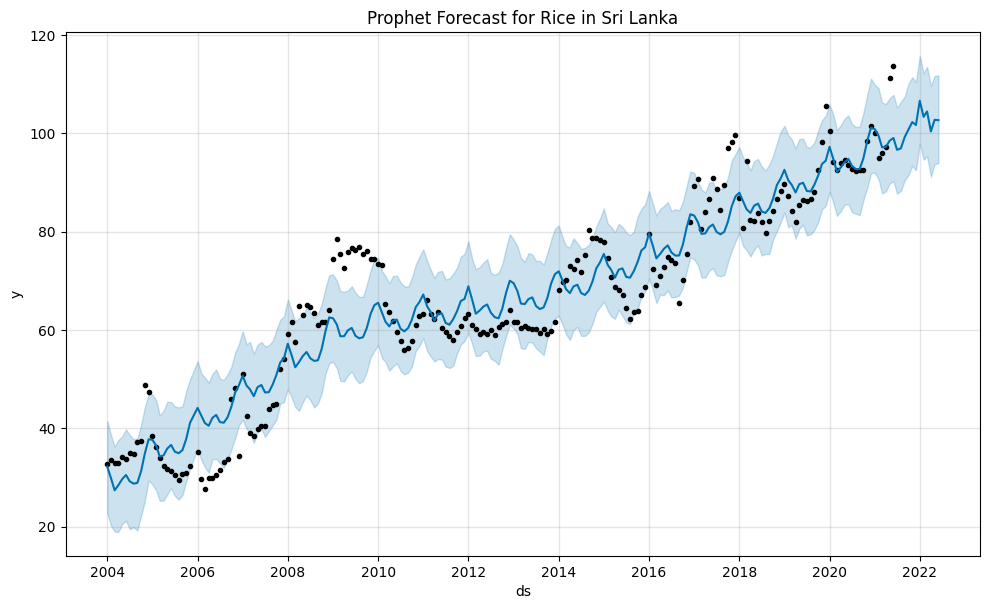

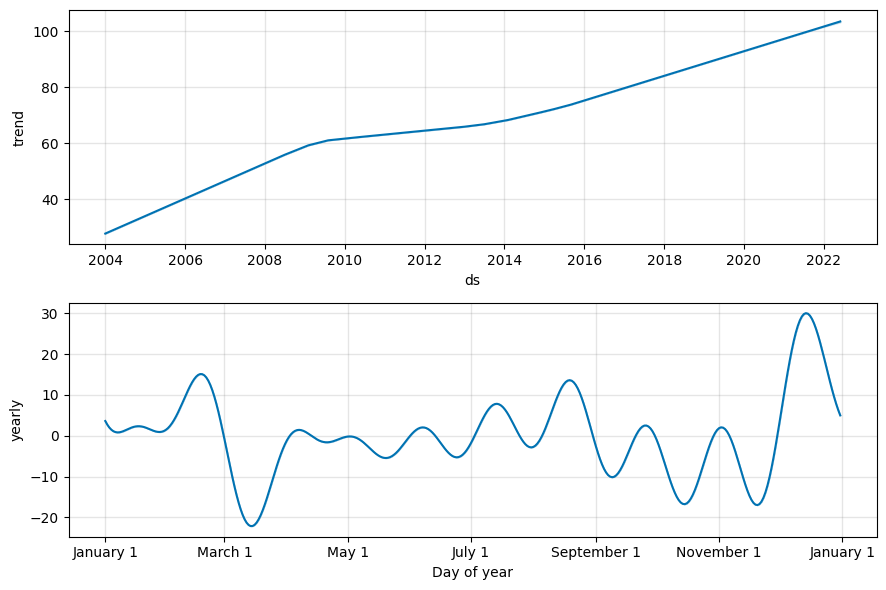

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y8hj8t/t0gc7arq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y8hj8t/rov26kaf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39186', 'data', 'file=/tmp/tmph0y8hj8t/t0gc7arq.json', 'init=/tmp/tmph0y8hj8t/rov26kaf.json', 'output', 'file=/tmp/tmph0y8hj8t/prophet_model49jfe45x/prophet_model-20250814050959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Backtesting MAE: 4.06
Backtesting RMSE: 6.71


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [7]:
# Load dataset with proper settings
df = pd.read_csv(
    "globalfoodprices_cleaned.csv",
    parse_dates=['date'],
    low_memory=False
)

# -------------------------
# 4.1 Filter for a single country & commodity (case-insensitive, partial match)
# -------------------------
commodity_filter = "Rice"
country_filter = "Sri Lanka"

data = df[
    df['cm_name'].str.lower().str.contains(commodity_filter.lower(), na=False) &
    df['adm0_name'].str.lower().str.contains(country_filter.lower(), na=False)
]

# Check if we have any rows
print(f"Number of rows after filtering: {data.shape[0]}")
if data.empty:
    raise ValueError("No data found for the given filters. Check commodity/country names.")

# Group by date and calculate average price
data_ts = data.groupby('date')['mp_price'].mean().reset_index()
data_ts = data_ts.sort_values(by='date')

print("Time series shape:", data_ts.shape)
print(data_ts.head())

# -------------------------
# 4.2 Classical Time Series Model: ARIMA
# -------------------------
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(data_ts['mp_price'], ax=axes[0])
plot_pacf(data_ts['mp_price'], ax=axes[1])
plt.show()

# Fit ARIMA model (example p,d,q)
model = ARIMA(data_ts['mp_price'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

# Forecast next 12 months
forecast_arima = model_fit.forecast(steps=12)

# Plot ARIMA forecast
plt.figure(figsize=(10,5))
plt.plot(data_ts['date'], data_ts['mp_price'], label="Historical")
plt.plot(pd.date_range(data_ts['date'].max(), periods=12, freq='M'),
         forecast_arima, label="ARIMA Forecast", color='red')
plt.title(f"ARIMA Forecast for {commodity_filter} in {country_filter}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# -------------------------
# 4.3 Modern Time Series Model: Prophet
# -------------------------
!pip install prophet --quiet
from prophet import Prophet

# Prepare data for Prophet
prophet_df = data_ts.rename(columns={'date': 'ds', 'mp_price': 'y'})

# Fit Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_df)

# Create future dataframe
future = prophet_model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast_prophet = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast_prophet)
plt.title(f"Prophet Forecast for {commodity_filter} in {country_filter}")
plt.show()

# Plot components
prophet_model.plot_components(forecast_prophet)
plt.show()

# -------------------------
# 4.4 Backtesting Prophet (last 12 months)
# -------------------------
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train-test split
train = prophet_df.iloc[:-12]
test = prophet_df.iloc[-12:]

# Refit Prophet on training set
prophet_model_bt = Prophet(yearly_seasonality=True)
prophet_model_bt.fit(train)

# Forecast
future_bt = prophet_model_bt.make_future_dataframe(periods=12, freq='M')
forecast_bt = prophet_model_bt.predict(future_bt)

# Extract predictions for test set
preds = forecast_bt.iloc[-12:]['yhat'].values

# Evaluate
mae = mean_absolute_error(test['y'], preds)
rmse = np.sqrt(mean_squared_error(test['y'], preds))

print(f"Backtesting MAE: {mae:.2f}")
print(f"Backtesting RMSE: {rmse:.2f}")
